In [4]:
# install requisite libraries and packages
#!pip install -U fsds_100719 --user
from fsds_100719.imports import *
from fsds_100719.ds import ihelp, reload
import fsds_100719 as fs
#fs.ft.hakkeray.hot_stats()

fsds_1007219  v0.4.45 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


In [104]:
#!pip install plotly
#!pip install plotly==4.4.1
#!pip install "notebook>=5.3" "ipywidgets>=7.2"
#!pip install psutil requests
#!pip install plotly-geo==1.0.0
#!pip install chart-studio==1.0.0

In [1]:
# connect to database / import data
import sqlite3 
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

In [8]:
# function for converting tables into dataframes on the fly
def get_table(cur, table):
    cur.execute(f"SELECT * from {table};")
    df = pd.DataFrame(cur.fetchall())
    df.columns = [desc[0] for desc in cur.description]
    return df

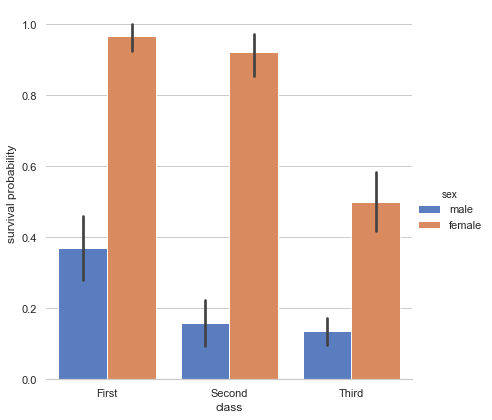

In [18]:
import seaborn as sns
sns.set(style="whitegrid")

# Load the example Titanic dataset
titanic = sns.load_dataset("titanic")

# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

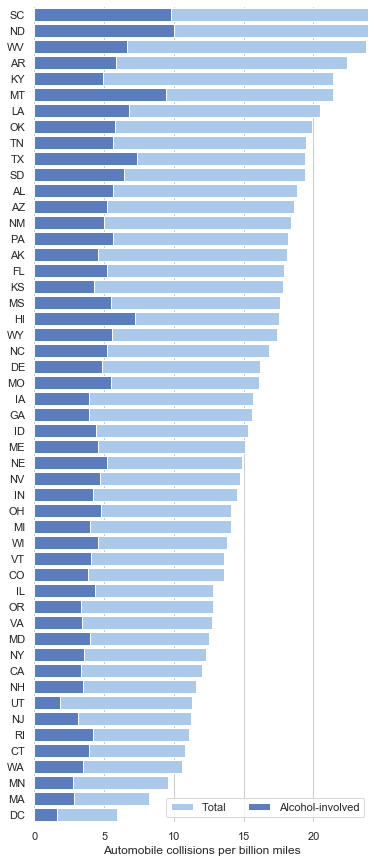

In [9]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

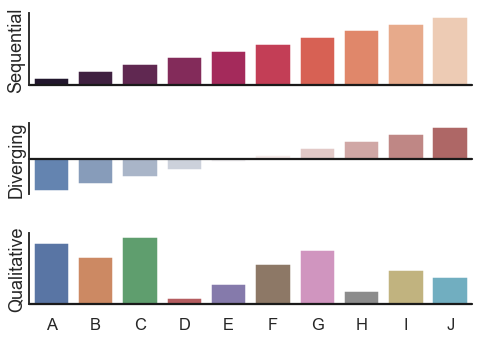

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")
rs = np.random.RandomState(8)

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

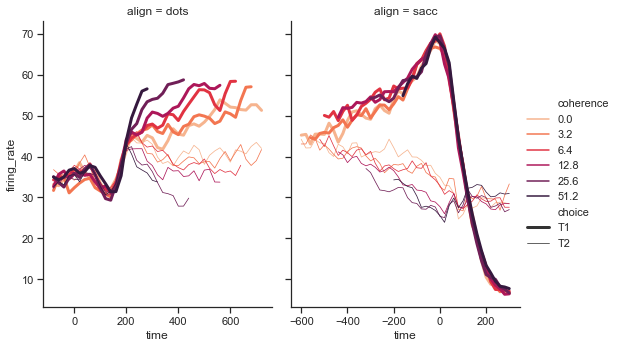

In [20]:

sns.set(style="ticks")

dots = sns.load_dataset("dots")

# Define a palette to ensure that colors will be
# shared across the facets
palette = dict(zip(dots.coherence.unique(),
                   sns.color_palette("rocket_r", 6)))

# Plot the lines on two facets
sns.relplot(x="time", y="firing_rate",
            hue="coherence", size="choice", col="align",
            size_order=["T1", "T2"], palette=palette,
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", data=dots)

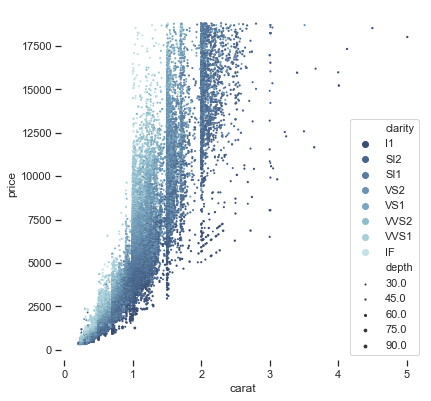

In [21]:
# Scatterplot with categorical and numerical semantics

# Load the example iris dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

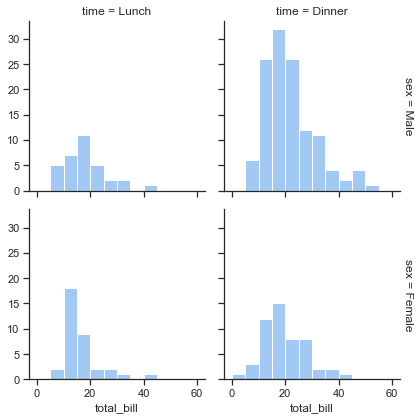

In [27]:
# Facetting histograms by subsets of data
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", bins=bins)

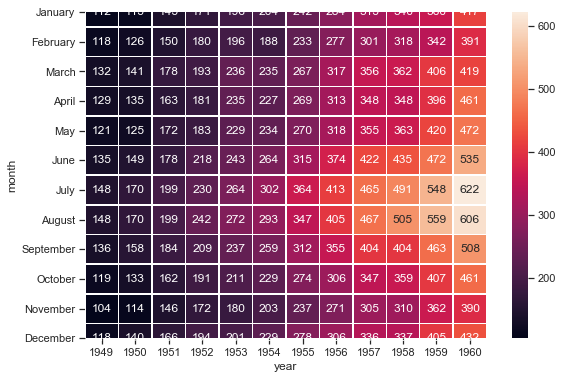

In [23]:
# ANNOTATED HEATMAPS

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

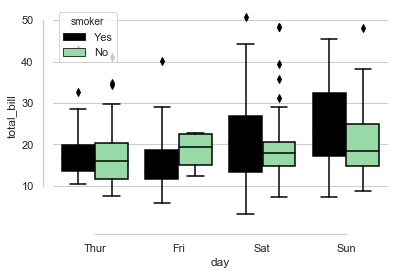

In [41]:
# GROUPED BOXPLOTS
sns.set(style="whitegrid", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["black", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

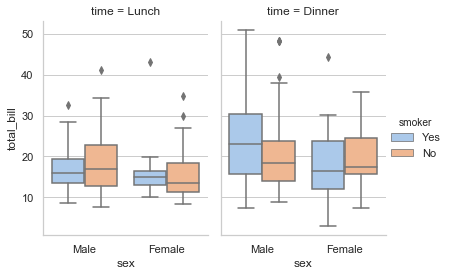

In [36]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
              data=tips, kind="box",
               height=4, aspect=.7);

/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/numeric.py:538: UserWarning:




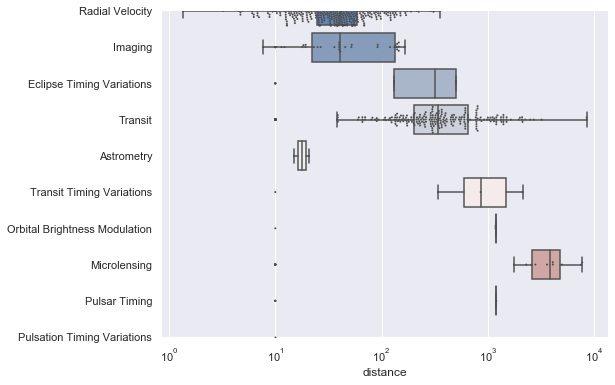

In [52]:
sns.set(style="darkgrid", palette="deep")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis="range", palette="vlag");

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0);

# Tweak the visual presentation
ax.xaxis.grid(True);
ax.set(ylabel="");
sns.despine(trim=True, left=True);

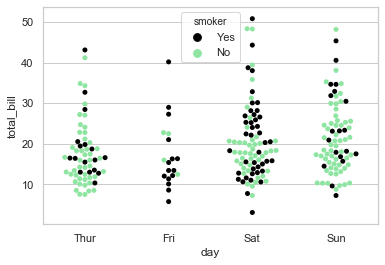

In [42]:
sns.swarmplot(x="day", y="total_bill",
            hue="smoker", palette=["black", "g"],
            data=tips)

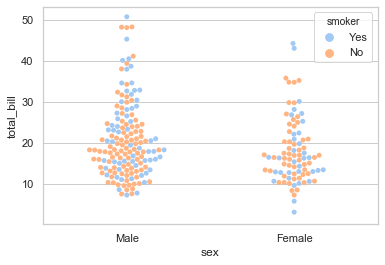

In [44]:
sns.swarmplot(x="sex", y="total_bill",
                hue="smoker",
              data=tips)

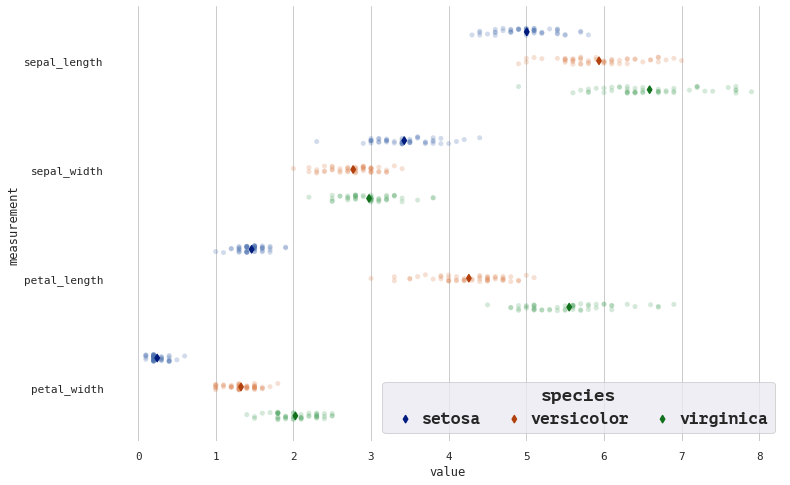

In [99]:
#Conditional Mean with Observations
#"font": "PT Mono", "font_scale": 1.2

sns.set(style="whitegrid", font="monospace", font_scale=1)
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(12,8))
sns.set(font = "PT Mono", font_scale=1.5)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

NameError: name 'df_revenue' is not defined

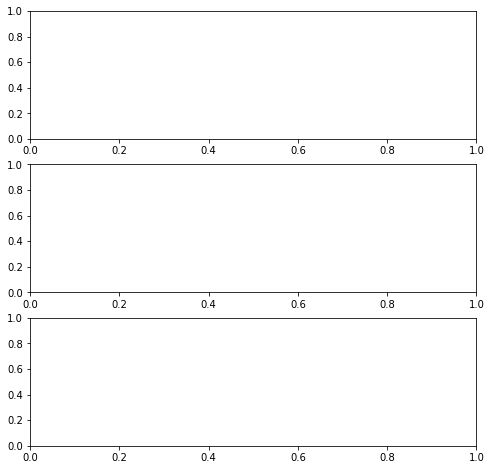

In [5]:
#Conditional Mean with Observations
#"font": "PT Mono", "font_scale": 1.2

sns.set(style="whitegrid", font="monospace", font_scale=1)
iris = sns.load_dataset("iris")

# "Melt" the dataset to "long-form" or "tidy" representation
iris = pd.melt(iris, "species", var_name="measurement")

# Initialize the figure
f, ax = plt.subplots(figsize=(12,8))
sns.set(font = "PT Mono", font_scale=1.5)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="measurement", hue="species",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="measurement", hue="species",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="species",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)


sns.set(style="whitegrid", font="monospace", font_scale=1)
region = 
# Plot number of orders, total revenue, and average revenue per order by region
fig, ax = plt.subplots(3, 1, figsize=(8,8))
# Number of orders
df_revenue.groupby(['Region'])['order_revenue'].count().plot(kind='barh', ax=ax1)

# Total Revenue
df_revenue.groupby(['Region'])['order_revenue'].sum().plot(kind='barh', ax=ax2)

# Average Revenue
df_revenue.groupby(['Region'])['order_revenue'].mean().plot(kind='barh', ax=ax3)

# Label plots and axes
ax1.set_title('Total Orders')
ax1.set_ylabel('')
ax2.set_title('Total Revenue in US$')
ax2.set_ylabel('')
ax3.set_title('Average Revenue per Order US$')
ax3.set_ylabel('')

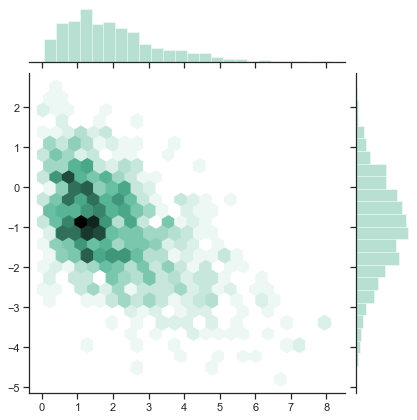

In [11]:
import numpy as np
import seaborn as sns
sns.set(style="ticks")

rs = np.random.RandomState(11)
x = rs.gamma(2, size=1000)
y = -.5 * x + rs.normal(size=1000)

sns.jointplot(x, y, kind="hex", color="#4CB391")

In [ ]:
# Use variables to hold names of dataframe columns to plot
col='TAX'
target='price'



## Make Figure, Axes
fig,axes = plt.subplots(ncols=2,figsize=(10,4))

## Make subplot 1 on ax[0]
title_1 = f"Distribution of {col.title()}"    
## Make dict of keywords for seaborn > hist_kws & kde_kws
hist_kws = {'alpha':0.5,'edgecolor':'black'}
kde_kws={'color':'red','ls':':'}

# Feed in column, hist and kde kwds, and ax
sns.distplot(df[col], hist_kws=hist_kws, kde_kws=kde_kws,ax=axes[0])

## CUSTOMIZE SUBPLOT 1 AX
ax = axes[0]

## Set X/Y Label fontdicts
label_font = {'weight':'semibold','size':16}
tick_font = {'size':12,'ha':'center','rotation':45}

ax.set_ylabel('Counts', fontdict=label_font)
ax.set_xlabel(col.title(), fontdict=label_font)
ax.set_title(title_1, fontdict=label_font)



## Make subplot 2 on ax[1]
title_2 = f"Scatter Plot of {col.title()} vs {target.title()}"
df.plot(kind='scatter',x=col,y=target, ax=axes[1])


## TICKS: 
# Somethings are changed using tickparams
# i.e. axes[0].xaxis.set_tick_params(**{'rotation':45})
# axes[0].set_xticklabels(axes[0].get_xticklabels(), fontdict=tick_font)#,rotation=45)

## CUSTOMIZE SUBPLOT 1 AX
ax = axes[1]
ax.set_ylabel(target.title(), fontdict=label_font)
ax.set_xlabel(col.title(), fontdict=label_font)
ax.set_title(title_2, fontdict=label_font)

## Make subplot 2 on ax[1]
plt.tight_layout()

In [ ]:
## 
def eda_function(df,col = "AGE",target='price',hist_kws=None, kde_kws={'color':'red','ls':':'},figsize=(12,4)):
    """Plots a seaborn displot for column with customization.
    Args:
     df (df)
     col (str)
     hist_kws (dict)
     kde_kws (dict) Accepts properties of https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
     figsize (dict)
    
    Returns:
        fig (matplotlib Figure)
        ax (list of Matplotlib Axes)

    Ex: 
    >> df = fs.datasets.load_boston()
    >> bathroom_break(df)
    """
    ## Fill in default hist_kws
    if hist_kws is None:
        hist_kws = {'alpha':0.5,'edgecolor':'black'}

    ## Set X/Y Label fonts
    label_font = {'weight':'semibold','size':16}
    tick_font = {'size':12,'ha':'center','rotation':45}


    ## Make Figure, Axes
    fig,axes = plt.subplots(ncols=2,figsize=figsize)

    ## Make subplot 1 on ax[0]
    title_1 = f"Distribution of {col.title()}"    
    sns.distplot(df[col], hist_kws=hist_kws, kde_kws=kde_kws,ax=axes[0])

    ## CUSTOMIZE SUBPLOT 1 AX
    ax = axes[0]
    ax.set_ylabel('Counts', fontdict=label_font)
    ax.set_xlabel(col.title(), fontdict=label_font)
    ax.set_title(title_1, fontdict=label_font)



    ## Make subplot 2 on ax[1]
    title_2 = f"Scatter Plot of {col.title()} vs {target.title()}"
    df.plot(kind='scatter',x=col,y=target, ax=axes[1])


    ## TICKS: 
    # Somethings are changed using tickparams
    # i.e. axes[0].xaxis.set_tick_params(**{'rotation':45})
    # axes[0].set_xticklabels(axes[0].get_xticklabels(), fontdict=tick_font)#,rotation=45)
    
    ## CUSTOMIZE SUBPLOT 1 AX
    ax = axes[1]
    ax.set_ylabel(target.title(), fontdict=label_font)
    ax.set_xlabel(col.title(), fontdict=label_font)
    ax.set_title(title_2, fontdict=label_font)
    ## Make subplot 2 on ax[1]
    plt.tight_layout()

    return fig, axes

fig, ax = eda_function(df)

In [10]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/iris.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['species_id'],
                   colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = df['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = df['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = df['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = df['petal_width'])
        ])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()

In [13]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                "petal_width": "Petal Width", "petal_length": "Petal Length", },
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=False)


import plotly.graph_objects as go
fig = go.FigureWidget(data=go.Bar(y=[2, 3, 1]))
#fig.write_image('figure.png')

/Users/hakkeray/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/axisgrid.py:848: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations



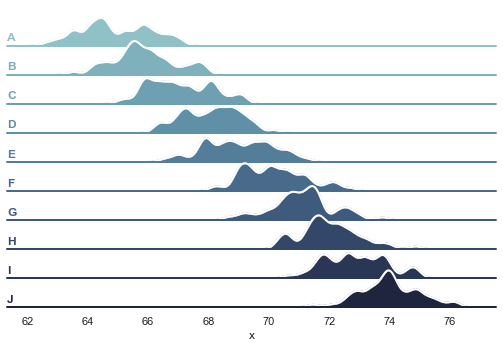

In [100]:
# OVERLAPPING DENSITIES (RIDGE PLOT)
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:
Box Plots
x = df['grade']
y = df['price']

plt.style.use('seaborn')
fig, ax = plt.subplots(ncols=1,figsize=(12,6))
sns.boxplot(x=x, y=y, ax=ax, showfliers=False) # outliers removed

# Create keywords for .set_xticklabels()
tick_kwds = dict(horizontalalignment='right', 
                  fontweight='light', 
                  fontsize='x-large',   
                  rotation=45)

ax.set_xticklabels(ax.get_xticklabels(),**tick_kwds)

title='Grade Boxplot - No Outliers'
ax.set_title(title.title())
ax.set_xlabel('grade')
ax.set_ylabel('price')
fig.tight_layout()

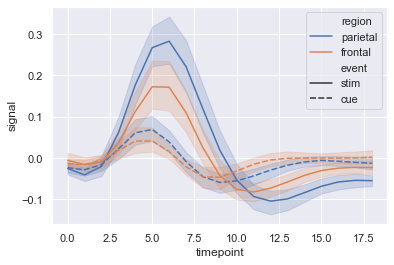

In [102]:
# TIME SERIES PLOT WITH ERROR BANDS
# Load an example dataset with long-form data
sns.set(style="darkgrid")
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

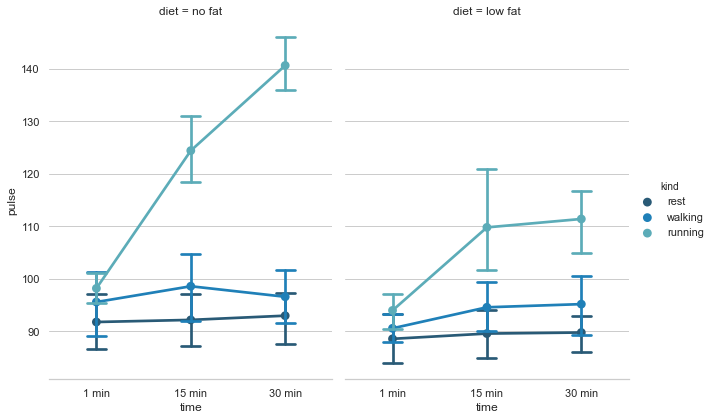

In [103]:
# PLOTTING 3-WAY ANOVA
sns.set(style="whitegrid")

# Load the example exercise dataset
df = sns.load_dataset("exercise")

# Draw a pointplot to show pulse as a function of three categorical factors
g = sns.catplot(x="time", y="pulse", hue="kind", col="diet",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", data=df)
g.despine(left=True)

In [ ]:

df = pd.DataFrame({
            ...         'SepalLength': [6.5, 7.7, 5.1, 5.8, 7.6, 5.0, 5.4, 4.6,
            ...                         6.7, 4.6],
            ...         'SepalWidth': [3.0, 3.8, 3.8, 2.7, 3.0, 2.3, 3.0, 3.2,
            ...                        3.3, 3.6],
            ...         'PetalLength': [5.5, 6.7, 1.9, 5.1, 6.6, 3.3, 4.5, 1.4,
            ...                         5.7, 1.0],
            ...         'PetalWidth': [1.8, 2.2, 0.4, 1.9, 2.1, 1.0, 1.5, 0.2,
            ...                        2.1, 0.2],
            ...         'Category': ['virginica', 'virginica', 'setosa',
            ...                      'virginica', 'virginica', 'versicolor',
            ...                      'versicolor', 'setosa', 'virginica',
            ...                      'setosa']
            ...     })
            >>> rad_viz = pd.plotting.radviz(df, 'Category')  # doctest: +SKIP



In [ ]:
 grouped = df.groupby(level='lvl1')
        >>> boxplot_frame_groupby(grouped)
        >>>
        >>> grouped = df.unstack(level='lvl1').groupby(level=0, axis=1)
        >>> boxplot_frame_groupby(grouped, subplots=False)

In [ ]:
pie = df.plot.pie(y='mass', figsize=(5, 5))
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
     |          ...                    'radius': [2439.7, 6051.8, 6378.1]},
     |          ...                   index=['Mercury', 'Venus', 'Earth'])
     |          >>> plot = df.plot.pie(y='mass', figsize=(5, 5))
     |      
     |      .. plot::
     |          :context: close-figs
     |      
     |          >>> plot = df.plot.pie(subplots=True, figsize=(6, 3))
        
        


In [ ]:
table(ax, data, rowLabels=None, colLabels=None, **kwargs)
        
    Helper function to convert DataFrame and Series to matplotlib.table
        
        Parameters
        ----------
        ax : Matplotlib axes object
        data : DataFrame or Series
            data for table contents
        kwargs : keywords, optional
            keyword arguments which passed to matplotlib.table.table.
            If `rowLabels` or `colLabels` is not specified, data index or column
            name will be used.
        
        Returns
        -------
        matplotlib table object

In [ ]:
def rewrite_as_lambda(value):
    if len(value) > 50:
        return 'Short'
    elif len(value) < 80:
        return 'Medium'
    else:
        return 'Long'
#Hint: nest your if, else conditionals
df['Review_length'] = df['Review_num_words'].map(lambda x: 'Short' if x < 50 else ('Medium' if x < 80 else 'Long'))
df.Review_length.value_counts(normalize=True)

In [ ]:
fig, ax = plt.subplots()
df['yr_built'].hist(bins=10, color='#68FDFE', edgecolor='black', grid=True, alpha=0.6)
xticks = (1900, 1920, 1940, 1960, 1980, 2000, 2015)
yticks = (0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000)
plt.xticks(xticks);
plt.yticks(yticks);
ax.set_title('Year Built Histogram', fontsize=16)
ax.set_xlabel('yr_built', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

In [ ]:
fig, ax = plt.subplots()
df['yb_cat'].hist(bins=4, color='#68FDFE', edgecolor='black', grid=True, alpha=0.6)
ax.set_title('Year Built Categories Histogram', fontsize=12)
ax.set_xlabel('Year Built Binned Categories', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# Let's look at the data distribution of the 70 unique zipcode values 
fig, ax = plt.subplots()
df['zipcode'].hist(bins=7, color='#67F86F',
edgecolor='black', grid=True)
ax.set_title('Zipcode Histogram', fontsize=16)
ax.set_xlabel('Zipcodes', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
# visualize the quantiles in the original distribution histogram

fig, ax = plt.subplots()

df['zipcode'].hist(bins=7, color='#67F86F', edgecolor='black', grid=True)
for quantile in quantiles:
    qvl = plt.axvline(quantile, color='black')
    ax.legend([qvl], ['Quantiles'], fontsize=10)
    ax.set_title('Zipcode Histogram with Quantiles',fontsize=12)
    ax.set_xlabel('Zipcodes', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)

In [ ]:
#correlation values to check

corr = df.corr()

# Checking multicollinearity with a heatmap
def multiplot(corr,figsize=(20,20)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True,mask=mask,annot=True,cmap="Greens",ax=ax)
    
    ax.set_ylim(len(corr), -.5, .5)
    
    
    return fig, ax

multiplot(np.abs(corr.round(3)))

In [ ]:
QUESTION: Does geography (location) have any relationship with the values of each categorical variable?

cats
['grade', 'condition', 'bathrooms', 'bedrooms', 'floors']
# lmplot geographic distribution by iterating over list of cat feats
for col in cats:
    sns.lmplot(data=df, x="long", y="lat", fit_reg=False, hue=col, height=10)
plt.show()

In [ ]:
# SUB_HISTS() function: plot histogram subplots
def sub_hists(data):
    plt.style.use('fivethirtyeight')
    for column in data.describe():
        fig = plt.figure(figsize=(12, 5))
        
        ax = fig.add_subplot(121)
        ax.hist(data[column], density=True, label = column+' histogram', bins=20)
        ax.set_title(column.capitalize())

        ax.legend()
        
        fig.tight_layout()

In [ ]:
# CORRCOEF_DICT() function: calculates correlation coefficients assoc. with features and stores in a dictionary
def corr_dict(X, y):
    corr_coefs = []
    for x in X:
        corr = df[x].corr(df[y])
        corr_coefs.append(corr)
    
    corr_dict = {}
    
    for x, c in zip(X, corr_coefs):
        corr_dict[x] = c
    return corr_dict

In [ ]:
# PLOT_REG() function: plot regression
def plot_reg(data, feature, target):
    sns.regplot(x=feature, y=target, data=data)
    plt.show()

In [ ]:
for col in x_cols:
    sns.catplot(x=col, y='price', height=10, legend=True, data=df)